# Classified Data Project - K-Nearest Neighbors

This project will be very similar to the exercise, but with another dataset to familiarise myself with the kNN algorithm.

#### Step 1: Import the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Step 2: Get the data

In [2]:
df = pd.read_csv('KNN_Project_Data')

#### Step 3: Explore the data

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


The dataset is classified, it is unknown what the columns mean. Note that all the values are numerical and that there is class called Target Class. 

#### Step 4: Standardise the variables
With the kNN classifier the scale of the variable is important. Any variables that are on a large scale will have much larger effect on the distance between observations, thus the kNN classifier. This is why it is important to standardise the variables.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

The output above schows the <code>scaled_features</code>, an array of values, these are the scaled versions of the actual values. 

#### Step 5: Create feature dataframe

In [9]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [10]:
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


#### Step 6: Split the data into a test and training set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_scaled
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Step 7: Import the kNN classifier

I will set K = 1

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kNN = KNeighborsClassifier(n_neighbors=1)

#### Step 8: Pass the training data into the kNN classifier

In [16]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Step 9: Create predictions

In [17]:
predictions = kNN.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

#### Step 10: Evaluate the kNN classifier

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



According to the output of the confusion matrix, the model has:
- accuracy: 0.72 (72%)
    the number of classifications a model correctly predicts divided by the total number of predictions made.
- precision: 0.73 (73%)
    the number of items that were relevant and retrieved by the model
- recall: 0.72(72%)
    the number of relevant items that were retrieved by the model


### Try other values for K 

It may be possible that there are better values that can be used for K. I will see whether the confusion matrix can have better values if I use other values.

### Step 11: Create an empty error array and loop over K values between 1 and 40

In [21]:
error_rate = []

for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    predictions_i = kNN.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

#### Step 12: Create a plot of the Error rates and the values for K

Text(0, 0.5, 'Error Rate')

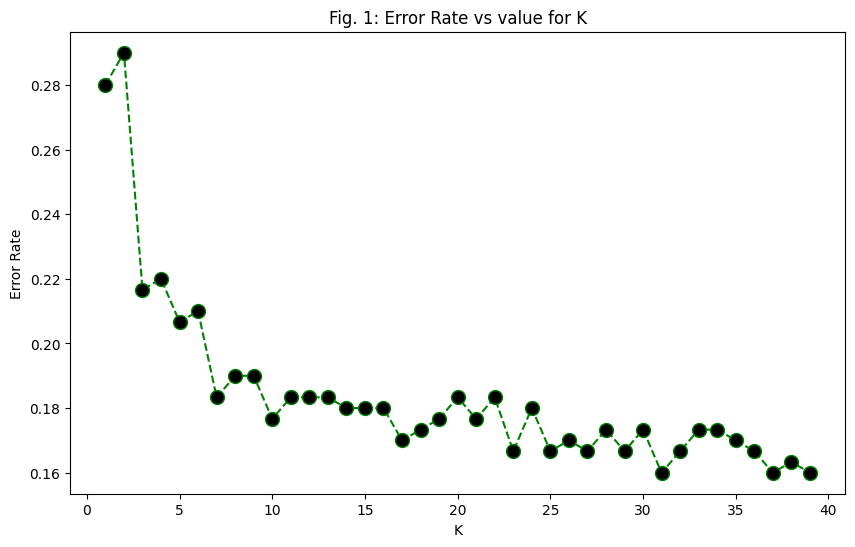

In [22]:
from matplotlib.lines import lineStyles


plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Fig. 1: Error Rate vs value for K')
plt.xlabel('K')
plt.ylabel('Error Rate')

According to the plot in Fig. 1 the error gate does down after K = 5 and tends to get even lower around K = 31

#### Step 13: Create a new kNN classifier with a better value for K

I will choose for K = 31

In [23]:
kNN31 = KNeighborsClassifier(n_neighbors=31)
kNN31.fit(X_train, y_train)
predictions31 = kNN31.predict(X_test)

#### Step 14: Print out the confusion matrix for the new value of K

In [24]:
print(confusion_matrix(y_test, predictions31))
print(classification_report(y_test, predictions31))

[[123  29]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



As you can see the output of the confusion matrix for K = 31 has improved a lot. The overall performance improved with approx. 10%.